<a href="https://colab.research.google.com/github/VeenaShirsath/COMPSCI590/blob/main/COMPSCI590_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries and settings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

sns.set()

pd.set_option('display.max_columns', None)

## 1. Importing the dataset, understanding the data

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime_unnormalized = fetch_ucirepo(id=211)

# data (as pandas dataframes)
X = communities_and_crime_unnormalized.data.features
y = communities_and_crime_unnormalized.data.targets

# metadata
print(communities_and_crime_unnormalized.metadata)

# variable information
print(communities_and_crime_unnormalized.variables)


{'uci_id': 211, 'name': 'Communities and Crime Unnormalized', 'repository_url': 'https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized', 'data_url': 'https://archive.ics.uci.edu/static/public/211/data.csv', 'abstract': "Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR", 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 2215, 'num_features': 125, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Education Level', 'Other', 'Occupation'], 'target_col': ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop'], 'index_col': ['communityname', 'countyCode

In [7]:
X

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,19

In [8]:
y

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,0,0.00,NaN,NaN,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,10,16.49,30.0,49.46,121.0,199.50,170.0,280.29,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,0,0.00,4.0,33.09,1.0,8.27,10.0,82.73,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,5,13.61,5.0,13.61,24.0,65.32,96.0,261.29,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,0,0.00,2.0,15.71,7.0,54.98,79.0,620.48,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


In [9]:
df = pd.concat([X, y], axis=1)

In [10]:
df

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.1

## 2. Setting the Treatment variable
  * current threshold for percentage of Black population is 30%
  * The histogram below shows the distribution of Blacks across different communiites. We take the threshold from this plot.

Bin Edges: [ 0.     9.667 19.334 29.001 38.668 48.335 58.002 67.669 77.336 87.003
 96.67 ]
Bin Counts: [1613.  243.  134.   88.   67.   35.   20.    7.    3.    5.]


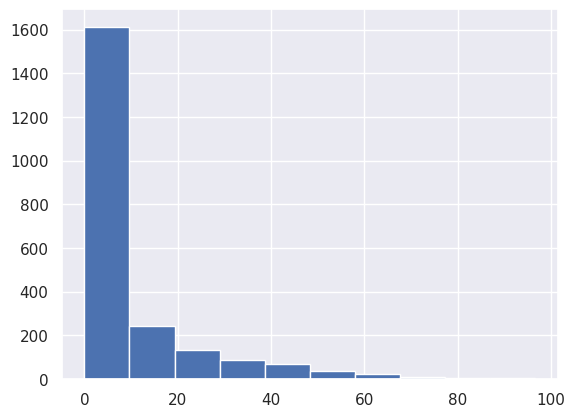

In [11]:
counts, bins, patches = plt.hist(df['pctBlack'])

# Print the bin edges
print("Bin Edges:", bins)

# Print the bin counts
print("Bin Counts:", counts)

plt.show()

In [12]:
## creating treatment variable
def treat(row):
    if row['pctBlack'] > 9.667:
        val = 0
    else:
        val = 1
    return val

df['treatment'] = df.apply(treat, axis=1)

In [13]:
df

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2780.9,4.37,NaN,NaN,NaN,NaN,0.0,NaN,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14

## 3. Data processing

In [14]:
null_cols = df.columns[df.isna().any()].tolist()

In [15]:
df[null_cols].isnull().sum()

,0
otherPerCap,1
numPolice,1872
policePerPop,1872
policeField,1872
policeFieldPerPop,1872
policeCalls,1872
policCallPerPop,1872
policCallPerOffic,1872
policePerPop2,1872
racialMatch,1872


In [16]:
states = df[(df['State'] == "MN") | (df['State'] == "IL") | (df['State'] == "MI")]

states[null_cols].isnull().sum()

,0
otherPerCap,0
numPolice,195
policePerPop,195
policeField,195
policeFieldPerPop,195
policeCalls,195
policCallPerPop,195
policCallPerOffic,195
policePerPop2,195
racialMatch,195


We are removing columns related to police dept (LEMAS survey) since that data is scarce. Also removing 3 states: MI, MN, IL because they are responsbile for missing data relating to rape crimes.

In [17]:
index_to_drop = df[(df['State'] == "MN") | (df['State'] == "IL") | (df['State'] == "MI")].index
df_new = df.drop(index_to_drop)

In [18]:
print(df_new.columns.tolist())

['State', 'pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPerOwnOccup', 'persPer

In [19]:
df_final = df_new.drop(['numPolice', 'policePerPop', 'policeField', 'policeFieldPerPop', 'policeCalls', 'policCallPerPop', 'policCallPerOffic', 'policePerPop2', 'racialMatch',
                       'pctPolicWhite', 'pctPolicBlack', 'pctPolicHisp', 'pctPolicAsian', 'pctPolicMinority', 'officDrugUnits', 'numDiffDrugsSeiz', 'policAveOT', 'landArea',
                       'popDensity', 'pctUsePubTrans', 'policCarsAvail', 'policOperBudget', 'pctPolicPatrol', 'gangUnit', 'pctOfficDrugUnit', 'policBudgetPerPop'], axis=1)

In [20]:
df_final

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,1
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,65.38,67.43,59.59,70.27,561,3.84,339,13.86,13.86,15.34,15.34,0.28,0.28,0.31,0.31,94.98,0.56,3.93,2.56,2.37,2.51,2.20,58.18,1.21,45.66,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN,1
5,M

In [21]:
null_cols_1 = df_final.columns[df_final.isna().any()].tolist()

In [22]:
df_final[null_cols_1].isnull().sum()

,0
otherPerCap,1
rapes,1
rapesPerPop,1
robberies,1
robbbPerPop,1
assaults,13
assaultPerPop,13
burglaries,3
burglPerPop,3
larcenies,3


In [23]:
#df_final[df_final['arsons'].isnull()]

null_count = df_final.groupby('State')['arsons'].apply(lambda x: x.isnull().sum()).reset_index(name='null_count')

print(null_count)

   State  null_count
0     AK           0
1     AL          27
2     AR           0
3     AZ           0
4     CA           0
5     CO           0
6     CT           0
7     DC           0
8     DE           0
9     FL           0
10    GA           0
11    IA          17
12    ID           0
13    IN           0
14    KS           1
15    KY           0
16    LA           3
17    MA           5
18    MD           3
19    ME           0
20    MO           0
21    MS           0
22    NC           0
23    ND           0
24    NH           0
25    NJ           0
26    NM           0
27    NV           1
28    NY          17
29    OH           3
30    OK           0
31    OR           0
32    PA           1
33    RI           0
34    SC           0
35    SD           1
36    TN           2
37    TX           1
38    UT           0
39    VA           0
40    VT           4
41    WA           1
42    WI           1
43    WV           0
44    WY           0


In [24]:
## State column needs to be encoded since it is a text column
df_final['State'] = df_final['State'].astype('category')

df_encoded = pd.get_dummies(df_final, columns=['State', ])

In [25]:
columns_to_convert = ['State_AK','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IN',
                      'State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MO','State_MS','State_NC','State_ND','State_NH','State_NJ','State_NM','State_NV',
                      'State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA',
                      'State_WI','State_WV','State_WY']
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

In [26]:
df_encoded

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

##### removing the rest of the NaN values by imputing using the mean of the column

In [43]:
df_filled_mean = df_encoded.fillna(df_encoded.mean())

In [45]:
df_final = df_filled_mean.copy()

## 4. Matching methods

### 4.1 Propensity score
Source code: https://www.kaggle.com/code/harrywang/propensity-score-matching-in-python

In [46]:
######## to be changed #########
# separate control and treatment for t-test
df_final_control = df_final[df_final['treatment'] == 0]
df_final_treatment = df_final[df_final['treatment'] == 1]

In [47]:
print(df_final_control['pop'].mean(), df_final_treatment['pop'].mean())

# compare samples
_, p = ttest_ind(df_final_control['pop'], df_final_treatment['pop'])
print(f'p={p:.3f}')

# interpret
alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

95477.6524822695 36689.41475295755
p=0.000
different distributions/different group mean (reject H0)


In [48]:
cols_matching = ['pop',	'perHoush','pctBlack','pctWhite','pctAsian','pctHisp','pct12-21','pct12-29','pct16-24','pct65up','persUrban','pctUrban','medIncome','pctWwage','pctWfarm',
                 'pctWdiv','pctWsocsec','pctPubAsst','pctRetire','medFamIncome','perCapInc','whitePerCap','blackPerCap','NAperCap','asianPerCap','otherPerCap','hispPerCap',
                 'persPoverty','pctPoverty','pctLowEdu','pctNotHSgrad','pctCollGrad','pctUnemploy','pctEmploy','pctEmployMfg','pctEmployProfServ','pctOccupManu','pctOccupMgmt',
                 'pctMaleDivorc','pctMaleNevMar','pctFemDivorc','pctAllDivorc','persPerFam','pct2Par','pctKids2Par','pctKids-4w2Par','pct12-17w2Par','pctWorkMom-6','pctWorkMom-18',
                 'kidsBornNevrMarr','pctKidsBornNevrMarr','numForeignBorn','pctFgnImmig-3','pctFgnImmig-5','pctFgnImmig-8','pctFgnImmig-10','pctImmig-3','pctImmig-5','pctImmig-8',
                 'pctImmig-10','pctSpeakOnlyEng','pctNotSpeakEng','pctLargHousFam','pctLargHous','persPerOccupHous','persPerOwnOccup','persPerRenterOccup','pctPersOwnOccup',
                 'pctPopDenseHous','pctSmallHousUnits','medNumBedrm','houseVacant','pctHousOccup','pctHousOwnerOccup','pctVacantBoarded','pctVacant6up','medYrHousBuilt',
                 'pctHousWOphone','pctHousWOplumb','ownHousLowQ','ownHousMed','ownHousUperQ','ownHousQrange','rentLowQ','rentMed','rentUpperQ','rentQrange','medGrossRent',
                 'medRentpctHousInc','medOwnCostpct','medOwnCostPctWO','persEmergShelt','persHomeless','pctForeignBorn','pctBornStateResid','pctSameHouse-5','pctSameCounty-5',
                 'pctSameState-5','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies',
                 'larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','violentPerPop','nonViolPerPop',
                 'State_AK','State_AL','State_AR','State_AZ','State_CA','State_CO','State_CT','State_DC','State_DE','State_FL','State_GA','State_IA','State_ID','State_IN',
                 'State_KS','State_KY','State_LA','State_MA','State_MD','State_ME','State_MO','State_MS','State_NC','State_ND','State_NH','State_NJ','State_NM','State_NV',
                 'State_NY','State_OH','State_OK','State_OR','State_PA','State_RI','State_SC','State_SD','State_TN','State_TX','State_UT','State_VA','State_VT','State_WA',
                 'State_WI','State_WV','State_WY']

In [49]:
# choose features for propensity score calculation
X = df_final[cols_matching]
y = df_final['treatment']

X.head()

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.02,1394.590000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.56,1955.950000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,218.59,6167.510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
# use logistic regression to calculate the propensity scores

lr = LogisticRegression()
lr.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# get the coefficients
lr.coef_.ravel()  # or reshape(-1) refers to an unknown dimension, often used to flatten the array

array([ 1.82958680e-05,  5.13619494e-08, -3.33614462e-05,  3.39434283e-05,
       -5.75817743e-07,  1.09586266e-05, -4.07251909e-08, -1.45058709e-06,
       -1.00850541e-06,  3.62504186e-06, -1.71524056e-05, -1.59381508e-07,
       -1.32262312e-04, -7.16014416e-07,  4.38314393e-07,  9.60727771e-06,
        6.36066432e-06,  5.31361714e-07,  2.67454050e-06,  2.11708028e-04,
        8.25890064e-04, -1.07087655e-03,  2.73916811e-05, -2.60513301e-06,
        5.75577908e-08,  1.90490141e-05, -2.40322648e-05,  2.24040594e-04,
       -1.10641142e-07,  1.59517124e-06,  3.70900644e-07, -1.79124357e-06,
        7.37792606e-07, -2.30927082e-07,  5.00717028e-07, -6.00134452e-07,
        5.60568807e-07, -3.25319538e-07, -7.82877657e-08, -3.31364135e-06,
       -2.26633522e-07, -1.74724429e-07,  1.36036934e-07,  1.18341893e-05,
        1.48041507e-05,  1.15337177e-05,  1.38241674e-05, -2.98718552e-06,
       -9.14101917e-07, -1.38556924e-03, -4.33995587e-06,  5.38433635e-05,
       -1.37800235e-06, -

In [52]:
# get the feature names
X.columns.to_numpy()

array(['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp',
       'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban',
       'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv',
       'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome',
       'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap',
       'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty',
       'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad',
       'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ',
       'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar',
       'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par',
       'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6',
       'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr',
       'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5',
       'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5',
       'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pc

In [53]:
# combine features and coefficients into a dataframe
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
coeffs

,column,coeff
0,pop,1.829587e-05
1,perHoush,5.136195e-08
2,pctBlack,-3.336145e-05
3,pctWhite,3.394343e-05
4,pctAsian,-5.758177e-07
...,...,...
156,State_VT,4.258289e-09
157,State_WA,7.651752e-08
158,State_WI,6.734365e-08
159,State_WV,1.554752e-08


In [54]:
# prediction
pred_binary = lr.predict(X)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

the binary prediction is: 1
the corresponding probabilities are: [0.01079919 0.98920081]


In [55]:
# the propensity score (ps) is the probability of being 1 (i.e., in the treatment group)
df_final['ps'] = pred_prob[:, 1]

# calculate the logit of the propensity score for matching if needed
# I just use the propensity score to match in this tutorial
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df_final['ps_logit'] = df_final.ps.apply(lambda x: logit(x))

df_final.head()

,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,pctKidsBornNevrMarr,numForeignBorn,pctFgnImmig-3,pctFgnImmig-5,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop,treatment,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MO,State_MS,State_NC,State_ND,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,ps,ps_logit
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.410000,41.02,1394.590000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.989201,4.517426
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.250000,127.56,1955.950000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.989260,4.523024
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.870000,2

<Axes: xlabel='ps', ylabel='Count'>

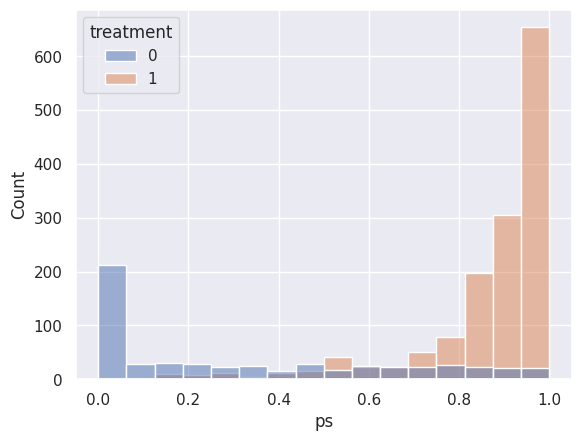

In [56]:
# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=df_final, x='ps', hue='treatment')  # multiple="dodge" for

In [ ]:
########### check more

### 4.2 Adaptive Hyperboxes

### 4.3 MALTS

### 4.4 Lasso Coefficient Matching